In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../SatLib')

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import islTradestudyFunc
%matplotlib inline

In [3]:
islTradestudyFunc.calcMinMaxParams(alt=6900, numSats=3)

'Minimum distance threshold required: 22987'

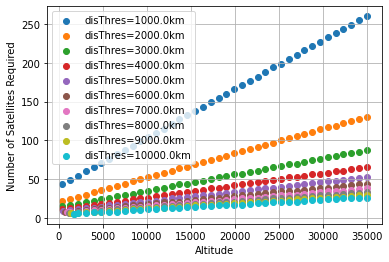

In [13]:
alt = np.linspace(400, 35000, 40)
disThres = np.linspace(1000, 10000, 10)
islTradestudyFunc.graphNumSats(alt, disThres, varyDisThres=True)

<IPython.core.display.Javascript object>


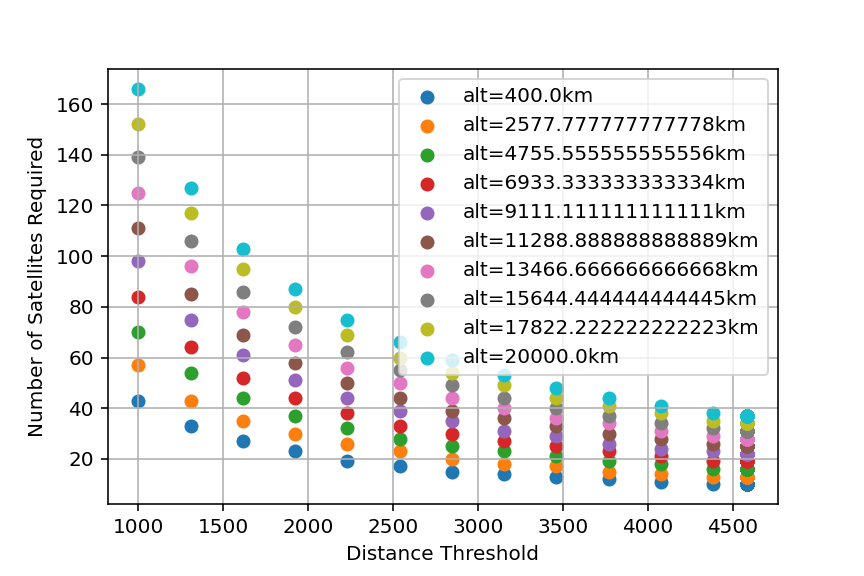

In [18]:
%matplotlib notebook
disThres = np.linspace(1000, 13000, 40)
alt = np.linspace(400, 20000, 10)
islTradestudyFunc.graphNumSats(alt, disThres, varyAlt=True)

In [6]:
import satbox as sb
import astropy.units as u
from astropy.time import Time
import Interval_Finder as IF

In [7]:
input_dict = {'i': 60, 't': 3, 'p': 1, 'f': 0, 'alt': 6900, 'dist_threshold': 23000, 'time': '2022-06-08T00:00:00', 'prop_dur': 1}
i = input_dict['i'] *u.deg
t = input_dict['t']
p = input_dict['p']
f = input_dict['f']
alt = input_dict['alt'] *u.km
dist_threshold = input_dict['dist_threshold']
time = input_dict['time']
prop_dur = input_dict['prop_dur']

In [8]:
epoch = Time(time, format='isot', scale='utc')
walker = sb.Constellation.from_walker(i, t, p, f, alt)
t2propagate = prop_dur*u.day
tStep = 60 * u.s
walkerSim = sb.SimConstellation(walker, t2propagate, tStep, verbose = True)
walkerSim.propagate()

/Users/manweichan/Desktop/MITPhD/SAS/code/.venv/lib/python3.7/site-packages/astropy/units/decorators.py:253: UserWarning: Wrapping true anomaly to -π <= nu < π
  return_ = wrapped_function(*func_args, **func_kwargs)


In [9]:
relative_position_data_ISL = IF.get_relative_position_data_ISL(walkerSim,dist_threshold)
satellites = IF.find_feasible_links_ISL(t, relative_position_data_ISL)
L_avail_ISL = IF.get_availability_ISL(satellites, relative_position_data_ISL)
L_poly_ISL = IF.get_polyline_ISL(satellites, relative_position_data_ISL)

No False Intervals Found


In [10]:
walker.generate_czml_file(prop_duration=prop_dur, sample_points=prop_dur*144, fname='islTradestudy', satellites=satellites, L_avail_ISL=L_avail_ISL, L_poly_ISL=L_poly_ISL, show_polyline_ISL=True, create_file=True)